# K-Nearest Neighbors for Classification

In [1]:
import pandas as pd

## Tissue samples

Electrical signals can be used to detect if tissue is cancerous. The goal is to determine whether a sample of breast tissue is:

- adipose tissue ("adi")
- carcinoma ("car")
- connective tissue ("con")
- fibro-adenoma ("fad")
- glandular tissue ("gla")
- mastopathy ("mas")

The training data consists of the results of scans for 106 tissue samples for which the above tissue class is known. We will focus on two features:

- I0: impedivity at 0 kHz,
- PA500: phase angle at 500 kHz

In [2]:
df_breast = pd.read_csv("http://dlsun.github.io/stats112/data/BreastTissue.csv")
df_breast

,Case #,Class,I0,PA500,HFS,DA,Area,A/DA,Max IP,DR,P
0,1,car,524.794072,0.187448,0.032114,228.800228,6843.598481,29.910803,60.204880,220.737212,556.828334
1,2,car,330.000000,0.226893,0.265290,121.154201,3163.239472,26.109202,69.717361,99.084964,400.225776
2,3,car,551.879287,0.232478,0.063530,264.804935,11888.391827,44.894903,77.793297,253.785300,656.769449
3,4,car,380.000000,0.240855,0.286234,137.640111,5402.171180,39.248524,88.758446,105.198568,493.701814
4,5,car,362.831266,0.200713,0.244346,124.912559,3290.462446,26.342127,69.389389,103.866552,424.796503
...,...,...,...,...,...,...,...,...,...,...,...
101,102,adi,2000.000000,0.106989,0.105418,520.222649,40087.920984,77.059161,204.090347,478.517223,2088.648870
102,103,adi,2600.000000,0.200538,0.208043,1063.441427,174480.476218,164.071543,418.687286,977.552367,2664.583623
103,104,adi,1600.000000,0.071908,-0.066323,436.943603,12655.342135,28.963331,103.732704,432.129749,1475.371534
104,105,adi,2300.000000,0.045029,0.136834,185.446044,5086.292497,27.427344,178.691742,49.593290,2480.592151


1\. Make a scatterplot of I0 and PA500; color the points by tissue class. Inspect the scatterplot and discuss the following questions before proceeding.

- Which classes do you think a classification model will be most successful at classifying? Least successful? Why?
- What tissue class would you predict for a new sample with an I0 of 400 and a PA500 of 0.18?

In [5]:
# YOUR CODE HERE. ADD CELLS AS NEEDED
import plotly.express as px

fig = px.scatter(df_breast, x="I0", y="PA500", color="Class")
fig.show()

2\. Fit a 5-nearest neighbors classification model for predicting tissue class from I0 and PA500. Don't forget to scale the features!

In [6]:
X_train = df_breast[["I0", "PA500"]]
y_train = df_breast["Class"]

In [7]:
# YOUR CODE HERE. ADD CELLS AS NEEDED
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier(n_neighbors=5)
)

pipeline.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])

3\. Use scikit-learn to produce the confusion matrix for the training data.

In [10]:
# YOUR CODE HERE. ADD CELLS AS NEEDED
from sklearn.metrics import confusion_matrix

y_train_ = pd.Series(pipeline.predict(X_train), name="Predicted")

confusion_matrix(y_train, y_train_)


array([[20,  0,  2,  0,  0,  0],
       [ 0, 20,  0,  0,  0,  1],
       [ 2,  0, 11,  1,  0,  0],
       [ 0,  0,  0, 13,  1,  1],
       [ 0,  0,  0,  3, 12,  1],
       [ 0,  2,  0,  8,  3,  5]])

4\. Compute by hand the training precision, recall, and F1 score for the carcinoma class. Then use scikit-learn to compute these values. Interpret the values.

In [12]:
# YOUR CODE HERE. ADD CELLS AS NEEDED

true_positives = ((y_train == "car") & (y_train_ == "car")).sum()

precision = true_positives / (y_train_ == "car").sum()

recall = true_positives / (y_train == "car").sum()

f1 = 2 * precision * recall / (precision + recall)

precision, recall, f1

(0.9090909090909091, 0.9523809523809523, 0.9302325581395349)

In [16]:
from sklearn.metrics import precision_score, recall_score, f1_score

prec = precision_score(y_train == "car", y_train_ == "car")

rec = recall_score(y_train == "car", y_train_ == "car")

f1 = f1_score(y_train == "car", y_train_ == "car")

prec, rec, f1


(0.9090909090909091, 0.9523809523809523, 0.9302325581395349)

This model did really well in classifying carcinoma. It had a recall of 0.95,
which means that the models was effectively capturing most of the carcinoma cases. It also had a precision of 0.9, which means that when the model predicted carcinoma, it was correct 90% of the time. The F1 score is 0.93, which is a good balance between precision and recall.

5\. Compute by hand the training precision, recall, and F1 score for the mastopathy class. Then use scikit-learn to compute these values. Is the F1 score closer to precision or recall? Why?

In [13]:
# YOUR CODE HERE. ADD CELLS AS NEEDED

true_positives = ((y_train == "mas") & (y_train_ == "mas")).sum()

precision = true_positives / (y_train_ == "mas").sum()

recall = true_positives / (y_train == "mas").sum()

f1 = 2 * precision * recall / (precision + recall)

precision, recall, f1

(0.625, 0.2777777777777778, 0.3846153846153846)

In [17]:
prec = precision_score(y_train == "mas", y_train_ == "mas")

rec = recall_score(y_train == "mas", y_train_ == "mas")

f1 = f1_score(y_train == "mas", y_train_ == "mas")

prec, rec, f1

(0.625, 0.2777777777777778, 0.3846153846153846)

Overall, this models is very poor with a f1 score of 0.38, which means that neither precision nor recall is very good. The precision is much higher that the recall which means that it is more likely to miss mastopathy cases than to incorrectly classify them as mastopathy.

6\. Compare the scores for the carcinoma and mastopathy class. Do the results make sense in light of what you discussed in part 1?

Yes, the results make sense. The model is much better at classifying carcinoma than mastopathy. This is because the carcinoma class is much more distinct from the other classes than the mastopathy class. The mastopathy class is much more similar to the other classes, so it is harder to classify.

7\. Use the model to predict the tissue class for a new sample with an I0 of 400 and a PA500 of 0.18. What are the predicted probabilities for each class?

In [18]:
# YOUR CODE HERE. ADD CELLS AS NEEDED

pipeline.predict([[400, 0.18]])

/Users/ishaansathaye/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:465: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



array(['car'], dtype=object)

## Titanic Data

We'll use $k$-nearest neighbors to predict who survives based on age, sex, and class.

In [19]:
df_titanic = pd.read_csv("https://dlsun.github.io/pods/data/titanic.csv ")

# drop the NaN for age since we're using it as a predictor
df_titanic = df_titanic.dropna(subset = ["age"])

df_titanic

,name,gender,age,class,embarked,country,ticketno,fare,survived
0,"Abbing, Mr. Anthony",male,42.0,3rd,S,United States,5547.0,7.11,0
1,"Abbott, Mr. Eugene Joseph",male,13.0,3rd,S,United States,2673.0,20.05,0
2,"Abbott, Mr. Rossmore Edward",male,16.0,3rd,S,United States,2673.0,20.05,0
3,"Abbott, Mrs. Rhoda Mary 'Rosa'",female,39.0,3rd,S,England,2673.0,20.05,1
4,"Abelseth, Miss. Karen Marie",female,16.0,3rd,S,Norway,348125.0,7.13,1
...,...,...,...,...,...,...,...,...,...
2202,"Wynn, Mr. Walter",male,41.0,deck crew,B,England,NaN,NaN,1
2203,"Yearsley, Mr. Harry",male,40.0,victualling crew,S,England,NaN,NaN,1
2204,"Young, Mr. Francis James",male,32.0,engineering crew,S,England,NaN,NaN,0
2205,"Zanetti, Sig. Minio",male,20.0,restaurant staff,S,England,NaN,NaN,0


In [27]:
df_titanic["class"].value_counts()

class
3rd                 707
victualling crew    431
1st                 324
engineering crew    324
2nd                 284
restaurant staff     69
deck crew            66
Name: count, dtype: int64

1\. Train a 10-nearest neighbors model to predict whether or not a passenger on the Titanic survived, using their age, sex, and class as features.

In [25]:
# YOUR CODE HERE. ADD CELLS AS NEEDED
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

X_train = df_titanic[["age", "gender", "class"]]
y_train = df_titanic["survived"]

preprocessor = make_column_transformer(
    (StandardScaler(), ["age"]),
    (OneHotEncoder(handle_unknown="ignore"), 
     ['gender', 'class'])
)

knn_model = make_pipeline(
    preprocessor,
    KNeighborsClassifier(n_neighbors=10)
)

knn_model.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(), ['age']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['gender', 'class'])])),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=10))])

2\. Use your model to predict whether a 20-year old female in first-class would survive. What about a 20-year old female in third-class? What are the predicted probabilities for each?

In [33]:
# YOUR CODE HERE. ADD CELLS AS NEEDED

X_new = pd.DataFrame({'age': [20], 'gender': ['female'], 'class': ['1st']})

knn_model.predict(X_new), knn_model.predict_proba(X_new)

(array([1]), array([[0., 1.]]))

In [34]:
X_new = pd.DataFrame({'age': [20], 'gender': ['female'], 'class': ['3rd']})

knn_model.predict(X_new), knn_model.predict_proba(X_new)

(array([0]), array([[0.8, 0.2]]))

3\. Calculate and interpret the training precision, recall, and F1 score for predicting survivors.

In [36]:
# YOUR CODE HERE. ADD CELLS AS NEEDED

# precision, recall, and f1 score for survivors (1)

y_train_ = pd.Series(knn_model.predict(X_train), name="Predicted")

prec = precision_score(y_train == 1, y_train_ == 1)

rec = recall_score(y_train == 1, y_train_ == 1)

f1 = f1_score(y_train == 1, y_train_ == 1)

prec, rec, f1

(0.8497757847533632, 0.5330520393811533, 0.6551426101987899)

4\. Calculate and interpret the training precision, recall, and F1 score for predicting non-survivors.

In [37]:
# YOUR CODE HERE. ADD CELLS AS NEEDED

prec = precision_score(y_train == 0, y_train_ == 0)

rec = recall_score(y_train == 0, y_train_ == 0)

f1 = f1_score(y_train == 0, y_train_ == 0)

prec, rec, f1

(0.8112563956793633, 0.9551539491298527, 0.8773439901629265)

5\. Since there are only two classes (survived or not) the model predicts survival if the predicted probability of survival is $0.5$ or higher. Change the threshold from 0.5 to 0.8 and compute the precision and recall for survivors and the non-survivors. How do the values compare to those with the threshold of 0.5?

In [39]:
# YOUR CODE HERE. ADD CELLS AS NEEDED

probas_ = knn_model.predict_proba(X_train)
probas_

array([[1. , 0. ],
       [0.8, 0.2],
       [1. , 0. ],
       ...,
       [0.7, 0.3],
       [1. , 0. ],
       [0.9, 0.1]])

In [43]:
y_train_ = (probas_[:, 1] >= 0.8)

(precision_score(y_train == 1, y_train_ == 1),
 recall_score(y_train == 1, y_train_ == 1),
 f1_score(y_train == 1, y_train_ == 1))


(0.9190031152647975, 0.4149085794655415, 0.5717054263565892)

In [44]:
(precision_score(y_train == 0, y_train_ == 0),
 recall_score(y_train == 0, y_train_ == 0),
 f1_score(y_train == 0, y_train_ == 0))

(0.7791932059447984, 0.9825970548862115, 0.8691533451746597)

6\. Plot the precision-recall curve for the survivors. Interpret what you see.

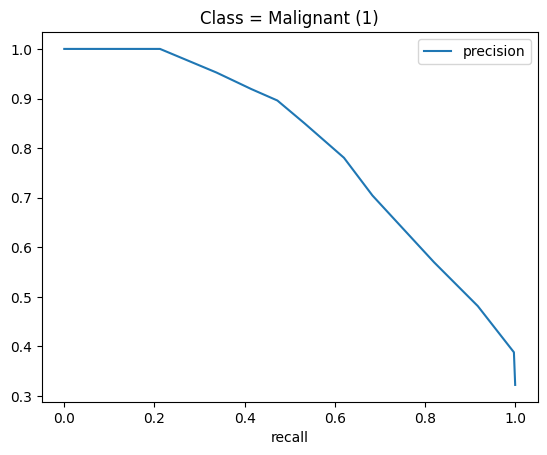

In [52]:
# YOUR CODE HERE. ADD CELLS AS NEEDED

from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(
    y_train == 1, probas_[:, 1]
)

pd.DataFrame({
    "precision": precisions,
    "recall": recalls
}).plot.line(x="recall", y="precision", title="Class = Malignant (1)");


7\. Plot the precision-recall curve for non-survivors. Interpret what you see.

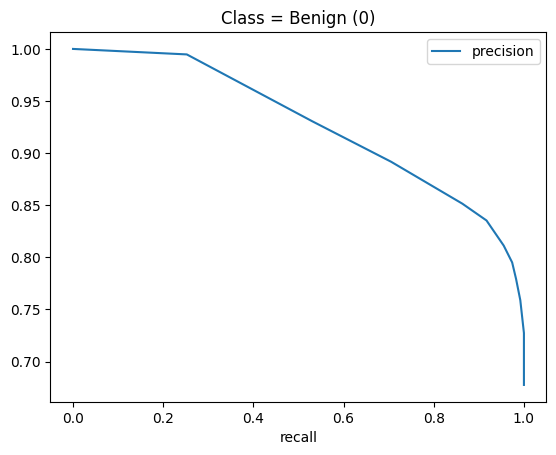

In [53]:
# YOUR CODE HERE. ADD CELLS AS NEEDED

precisions, recalls, thresholds = precision_recall_curve(
    y_train == 0, probas_[:, 0]
)

pd.DataFrame({
    "precision": precisions,
    "recall": recalls
}).plot.line(x="recall", y="precision", title="Class = Benign (0)");
